### Simple Recommender System for new anime file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys

In [2]:
anime_data = pd.read_csv('DATA/anime_cleaned.csv')
anime_data 

,Unnamed: 0,title,genre,synopsis,producer,studio,rating,scoredby,members,source,aired
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",Bandai Visual,Sunrise,8.81,363889,704490,Original,"Apr 3, 1998 to Apr 24, 1999"
1,2,Cowboy Bebop Tengoku no Tobira,"Action, Space, Drama, Mystery, Sci-Fi","Another day, another bounty—such is the life o...","Sunrise, Bandai Visual",Bones,8.41,111187,179899,Original,"Sep 1, 2001"
2,3,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",Victor Entertainment,Madhouse,8.31,197451,372709,Manga,"Apr 1, 1998 to Sep 30, 1998"
3,4,Witch Hunter Robin,"Action, Magic, Police, Supernatural, Drama, My...",Witches are individuals with special powers li...,Bandai Visual,Sunrise,7.34,31875,74889,Original,"Jul 2, 2002 to Dec 24, 2002"
4,5,Eyeshield 21,"Action, Sports, Comedy, Shounen",Sena is like any other shy kid starting high s...,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Studio Gallop,8.05,48765,106468,Manga,"Apr 6, 2005 to Mar 19, 2008"
...,...,...,...,...,...,...,...,...,...,...,...
3180,3181,Gegege no Kitarou 2018,"Comedy, Demons, Supernatural, Shounen","Nearly twenty years into the 21st century, peo...","Yomiko Advertising, Fuji TV",Toei Animation,6.90,2959,16929,Manga,"Apr 1, 2018 to ?"
3181,3182,Last Period Owarinaki Rasen no Monogatari,"Action, Adventure, Comedy, Fantasy, Magic","""Period"" is how magic users called who beat ""S...",Egg Firm,J.C.Staff,6.01,1723,12957,Game,"Apr 12, 2018 to Jun 28, 2018"
3182,3183,Omae wa Mada Gunma wo Shiranai,"Comedy, School",Nori Kamitsuki has recently moved to the Gunma...,TOHO animation,Asahi Production,5.27,1120,7534,Web manga,"Apr 2, 2018 to Jun 18, 2018"
3183,3184,Black Clover Jump Festa 2018 Special,"Comedy, Fantasy, Shounen",The special episode features the captains of t...,"TV Tokyo, Avex Pictures, Shueisha",Studio Pierrot,6.12,1844,5398,Manga,"Nov 25, 2018"


## The features of the dataset are as follows: 
#### -Anime_id : anime Id (as per myanimelist.net)
#### -Title : name of anime
#### -Genre : Main genre
#### -Synopsis : Brief Discription
#### -Rating : Rating of anime as per myanimelist.net/
#### -ScoredBy : Total number of users who scored the given anime
#### -Popularity : Rank of anime based on popularity
#### -Members : Number of members added given anime on their list
#### -Episodes : Number of episodes

### For the Weighted Score Recommendation System we only need a few columns from the above dataset

In [3]:
anime_data = anime_data[['title','rating','scoredby','members']]
anime_data

,title,rating,scoredby,members
0,Cowboy Bebop,8.81,363889,704490
1,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899
2,Trigun,8.31,197451,372709
3,Witch Hunter Robin,7.34,31875,74889
4,Eyeshield 21,8.05,48765,106468
...,...,...,...,...
3180,Gegege no Kitarou 2018,6.90,2959,16929
3181,Last Period Owarinaki Rasen no Monogatari,6.01,1723,12957
3182,Omae wa Mada Gunma wo Shiranai,5.27,1120,7534
3183,Black Clover Jump Festa 2018 Special,6.12,1844,5398


# A recommender system that recommends the highest rated anime to a user

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [4]:

V = anime_data['scoredby']                     
R = anime_data['rating']                    
C = anime_data['rating'].mean()             
m = anime_data['scoredby'].quantile(0.80)        

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m) 

/home/bhavana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
anime_data.head()

,title,rating,scoredby,members,weighted_avg
0,Cowboy Bebop,8.81,363889,704490,8.602928
1,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899,8.016863
2,Trigun,8.31,197451,372709,8.073213
3,Witch Hunter Robin,7.34,31875,74889,7.256490
4,Eyeshield 21,8.05,48765,106468,7.607178


In [6]:
wavg = anime_data.sort_values('weighted_avg', ascending = False)
wavg.head()

,title,rating,scoredby,members,weighted_avg
1357,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,9.109469
2765,Kimi no Na wa.,9.19,467437,724490,8.984706
1628,Steins;Gate,9.14,561405,1005781,8.970440
1784,Hunter x Hunter 2011,9.11,400879,716409,8.884161
1126,Code Geass Hangyaku no Lelouch R2,8.95,541989,788845,8.792127


Text(0, 0.5, 'Anime Title')

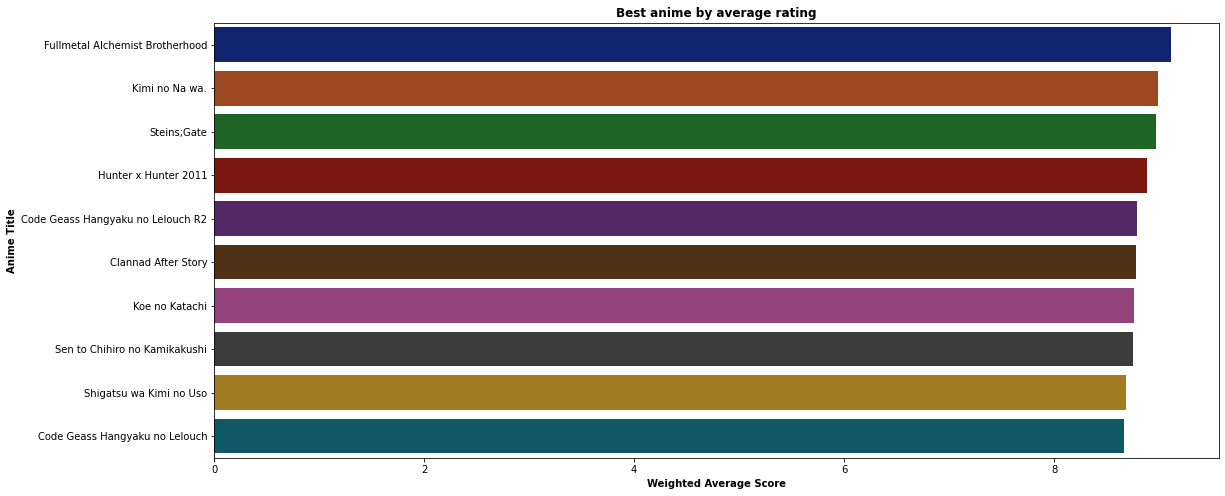

In [7]:

plt.figure(figsize=(18,8))

ax = sns.barplot(x = wavg['weighted_avg'].head(10), y = wavg['title'].head(10), data =wavg, palette='dark')

plt.title('Best anime by average rating', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')


### Recommending according to the anime with the largest members

In [8]:
anime_members = anime_data.sort_values('members',ascending = False)
anime_members.head(20)

,title,rating,scoredby,members,weighted_avg
767,Death Note,8.67,1006242,1451708,8.595514
1990,Shingeki no Kyojin,8.49,936784,1340641,8.420100
1811,Sword Art Online,7.64,913806,1297309,7.615856
1357,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,9.109469
2561,One Punch Man,8.73,687965,1015163,8.619196
2270,Tokyo Ghoul,8.01,656039,1008192,7.948958
1465,Angel Beats!,8.31,640177,1007952,8.224232
1628,Steins;Gate,9.14,561405,1005781,8.970440
787,Code Geass Hangyaku no Lelouch,8.79,625466,983674,8.664236
8,Naruto,7.88,645672,975394,7.828085


Text(0, 0.5, 'Anime Title')

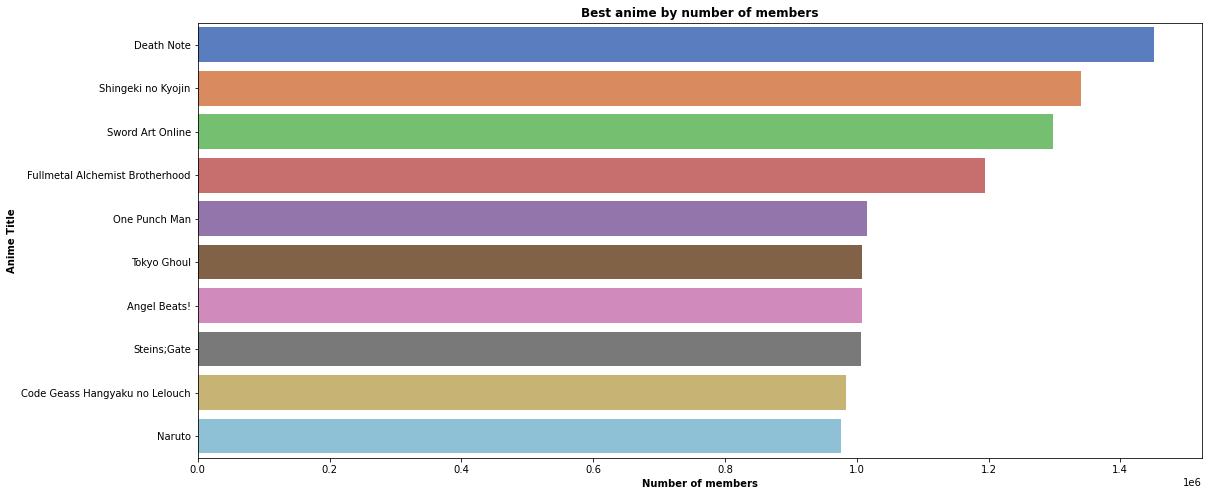

In [9]:
plt.figure(figsize=(18,8))

ax = sns.barplot(x = anime_members['members'].head(10), y = anime_members['title'].head(10), data = anime_members, palette='muted')

plt.title('Best anime by number of members', weight = 'bold')
plt.xlabel('Number of members', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

# Recommending Anime according to the weighted ratings and members 

In [10]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(anime_data[['weighted_avg','members']])
data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','members'])
data_norm.head()

,weighted_avg,members
0,0.861237,0.484677
1,0.700690,0.122890
2,0.716127,0.255862
3,0.492393,0.050469
4,0.588460,0.072248


In [11]:
anime_data[['norm_weighted_avg','norm_members']] = data_norm
anime_data['score'] = anime_data['norm_weighted_avg']*0.5 + anime_data['norm_members']*0.5
data_scored = anime_data.sort_values(['score'], ascending=False)
data_scored.head()

/home/bhavana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/bhavana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,rating,scoredby,members,weighted_avg,norm_weighted_avg,norm_members,score
767,Death Note,8.67,1006242,1451708,8.595514,0.859206,1.000000,0.929603
1357,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,9.109469,1.000000,0.822627,0.911314
1990,Shingeki no Kyojin,8.49,936784,1340641,8.420100,0.811153,0.923402,0.867278
1628,Steins;Gate,9.14,561405,1005781,8.970440,0.961914,0.692464,0.827189
2561,One Punch Man,8.73,687965,1015163,8.619196,0.865694,0.698934,0.782314


In [12]:
data_scored[['title','norm_weighted_avg','norm_members','score']].head()

,title,norm_weighted_avg,norm_members,score
767,Death Note,0.859206,1.000000,0.929603
1357,Fullmetal Alchemist Brotherhood,1.000000,0.822627,0.911314
1990,Shingeki no Kyojin,0.811153,0.923402,0.867278
1628,Steins;Gate,0.961914,0.692464,0.827189
2561,One Punch Man,0.865694,0.698934,0.782314


Text(0, 0.5, 'Movie Title')

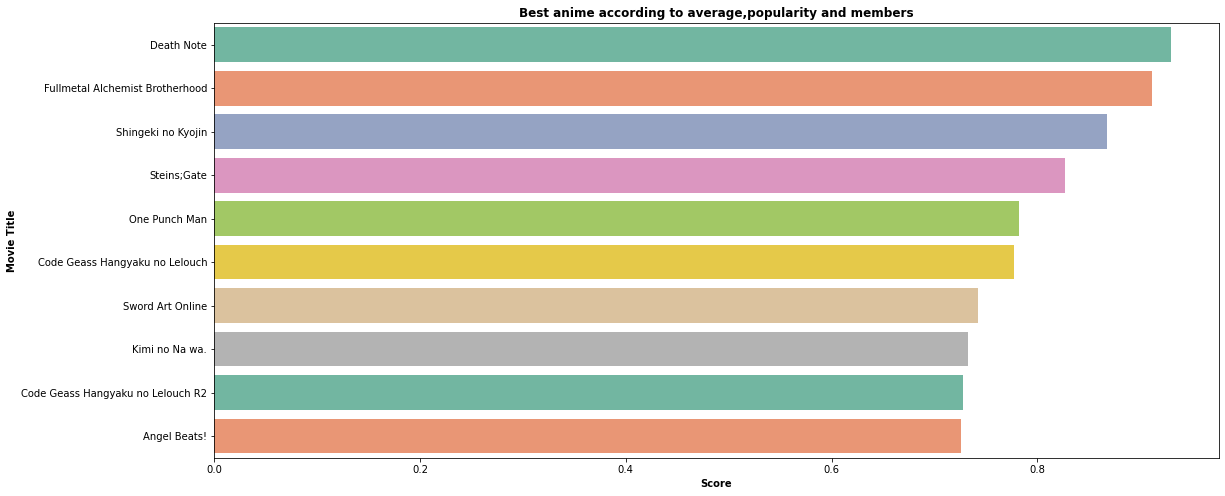

In [13]:
plt.figure(figsize=(18,8))

ax = sns.barplot(x = data_scored['score'].head(10), y = data_scored['title'].head(10), data = data_scored, palette='Set2')


plt.title('Best anime according to average,popularity and members', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
